# Lab 6: Calculations

## Part 1: Differential Pressure Measurments

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
dirPath = os.path.realpath('.')
fileName = 'rawData/measurements.xlsx'
filePath = os.path.join(dirPath, fileName)
df = pd.read_excel(filePath,sheetname="Part1",header=0)
print(df)
cols = df.columns

    deltah(cm)  error (cm)  V (mV)  error (mV)  deltah(cm).1  error (cm).1  \
0            0           1       1           1           -75             1   
1           -5           1     -17           1           -70             1   
2          -10           1     -34           1           -65             1   
3          -15           1     -54           1           -60             1   
4          -20           1     -67           1           -55             1   
5          -25           1     -86           1           -50             1   
6          -30           1    -106           1           -45             1   
7          -35           1    -122           1           -40             1   
8          -40           1    -141           1           -35             1   
9          -45           1    -160           1           -30             1   
10         -50           1    -177           1           -25             1   
11         -55           1    -194           1           -20    

### Plotting

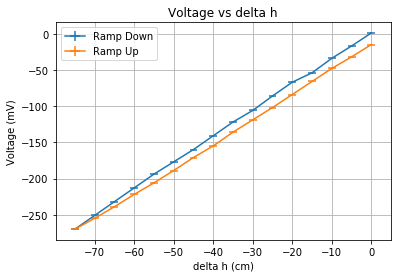

In [5]:
plt.figure(1)
plt.errorbar(df[cols[0]],df[cols[2]],xerr=df[cols[1]],yerr=df[cols[3]])
plt.errorbar(df[cols[4]],df[cols[6]],xerr=df[cols[5]],yerr=df[cols[7]])
plt.title('Voltage vs delta h')
plt.xlabel('delta h (cm)')
plt.ylabel('Voltage (mV)')
plt.legend(['Ramp Down','Ramp Up'])
plt.grid()
plt.savefig('pressure.png')
plt.show()

### Plot again, but zoom in so that error bars are visible

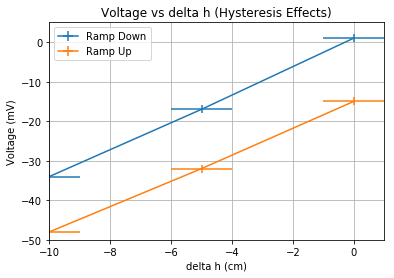

In [7]:
plt.figure(1)
plt.errorbar(df[cols[0]],df[cols[2]],xerr=df[cols[1]],yerr=df[cols[3]])
plt.errorbar(df[cols[4]],df[cols[6]],xerr=df[cols[5]],yerr=df[cols[7]])
plt.title('Voltage vs delta h (Hysteresis Effects)')
plt.xlabel('delta h (cm)')
plt.ylabel('Voltage (mV)')
plt.legend(['Ramp Down','Ramp Up'])
plt.axis([-10,1,-50,5])
plt.grid()
plt.savefig('pressureHysteresis.png')
plt.show()

### Effects of Hysteresis

In [ ]:
hysteresisOffset = df[cols[1]][0]-df[cols[4]][len(df[cols[4]])-1]
print('Hysteresis Offset =', hysteresisOffset,'mV')
hysteresisError = np.sqrt(1**2 + 1**2)
print('Hysteresis Error =',hysteresisError, 'mV')